In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

/home/danil/miniconda/envs/py3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/danil/miniconda/envs/py3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Read data

In [2]:
df = pd.read_csv('challenge_dataset.txt', names=['x', 'y'])

### Small data investigation

In [3]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# 1. No missing data
# 2. Not super big difference in the scale
df.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Create pipeline for getting the best estimator

In [5]:
pipeline = Pipeline([('lr', LinearRegression(n_jobs=-1))])

In [6]:
pipeline.get_params()

{'lr': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': -1,
 'lr__normalize': False,
 'steps': [('lr',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False))]}

In [7]:
parameters = {
    'lr__fit_intercept': (True, False),
    'lr__normalize': (True, False),
    'lr__copy_X': (True, False),
}

In [8]:
# for scoring use mean squared error regression loss:
# http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

grid = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error')

In [9]:
X = np.array([df.x.values]).T
y = np.array([df.y.values]).T

In [10]:
grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__fit_intercept': (True, False), 'lr__copy_X': (True, False), 'lr__normalize': (True, False)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [11]:
print('The best score is: {}'.format(grid.best_score_))
print('The best parameters are: {}'.format(grid.best_params_))

The best score is: -12.805958994149623
The best parameters are: {'lr__fit_intercept': True, 'lr__copy_X': True, 'lr__normalize': True}


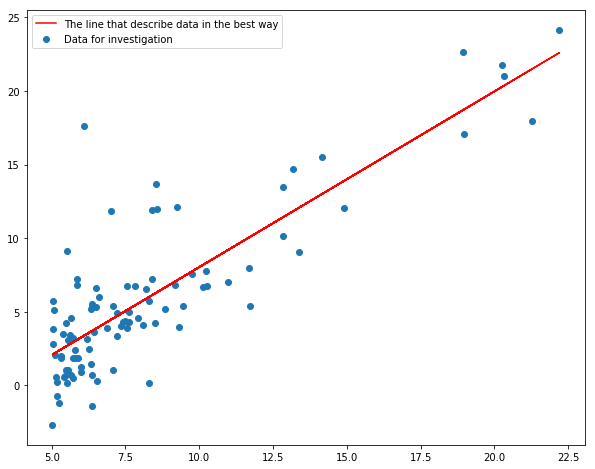

In [12]:
plt.figure(figsize=(10, 8))

plt.scatter(df.x.values, df.y.values)
plt.plot(X, grid.best_estimator_.predict(X), color='r')
plt.legend(['The line that describe data in the best way', 'Data for investigation']);